In [45]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_gate_map
import numpy as np

Use of qiskit_aer for simulating on local hardware

## 1. Circuit Construction

In [46]:
# Create three quantum registers (sender’s qubit, shared entanglement pair, receiver’s qubit) and two classical registers.
qc = QuantumCircuit(3,2)

In [47]:
# Values for the sender qubit
# Arbitrary values that rotate the qubit 
theta, phi, lam = np.pi/3, np.pi/4, np.pi/2

qc.u(theta, phi, lam, 0) # U gate on 0 qubit


In [48]:
# Entangle qubit 1 and qubit 3 to a bell state
qc.h(1)
qc.cx(1, 2)

In [49]:
# Bell measurement on sender side
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

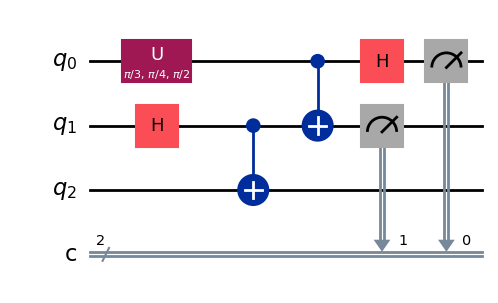

In [50]:
qc.draw("mpl")

## 2. Exeuction on Simulators

In [62]:
from qiskit_aer import AerSimulator
sim_statevector = AerSimulator(method='statevector')

# TODO: need to get the statevector

In [63]:
# Transpile for the simulator
qc_t = transpile(qc, sim_statevector)
print(qc_t)

     ┌────────────────┐          ┌───┐┌─┐
q_0: ┤ U(π/3,π/4,π/2) ├───────■──┤ H ├┤M├
     └─────┬───┬──────┘     ┌─┴─┐└┬─┬┘└╥┘
q_1: ──────┤ H ├─────────■──┤ X ├─┤M├──╫─
           └───┘       ┌─┴─┐└───┘ └╥┘  ║ 
q_2: ──────────────────┤ X ├───────╫───╫─
                       └───┘       ║   ║ 
c: 2/══════════════════════════════╩═══╩═
                                   1   0 


In [66]:
# Run the circuit
shots = 1000
result = sim_statevector.run(qc_t, shots=shots).result()
counts = result.get_counts(0)
print(counts)
# state_before = result.get_statevector()



{'11': 243, '01': 244, '00': 256, '10': 257}


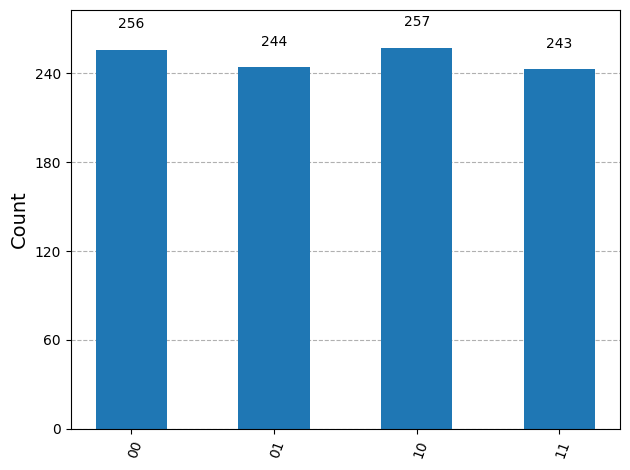

In [67]:
plot_histogram(counts)

In [42]:
# Apply correction conditionally on classical bits
qc_corr = qc.copy()
qc_corr.x(2)
qc_corr.z(2)

In [16]:
sim_qasm = AerSimulator()
result_qasm = sim.run(qc_corr).result()
counts = result_qasm.get_counts()

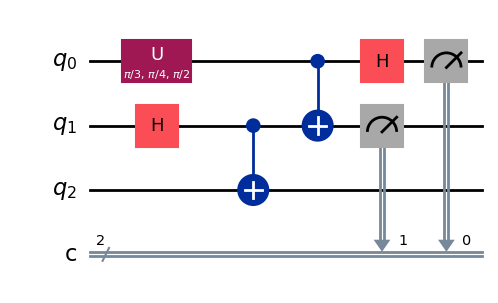